<h1>ST1505 DevOps & Automation for AI</h1>

Author: Ella

S/N : p2100733

Class : DAAA/FT/2B04

In [51]:
# CHECKING SKLEARN VERSION
!pip list | grep scikit-learn

scikit-learn                 1.1.2


In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [27]:
df = pd.read_csv('./data/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [28]:
df_copy = df.copy()

In [29]:
# Data set information like type of features and count of Non-Null information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this datset there are no null values

Here we have some object features, we have to coonvert them to numerical form

In [30]:
obj_cols = df.select_dtypes(include=['object'])
obj_cols.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [31]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

sex feature has 2 unique values
male      676
female    662
Name: sex, dtype: int64


/home/ngaitahu/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:278: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/home/ngaitahu/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


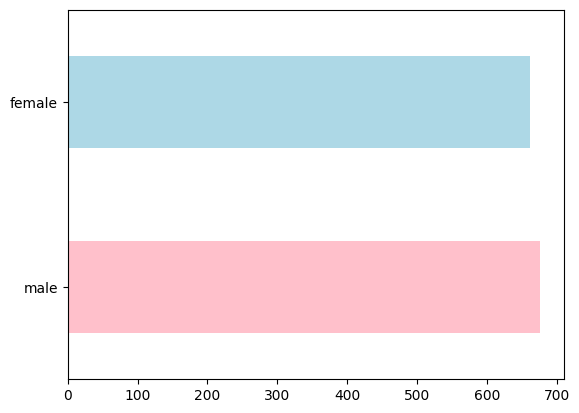


smoker feature has 2 unique values
no     1064
yes     274
Name: smoker, dtype: int64


/home/ngaitahu/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:278: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/home/ngaitahu/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


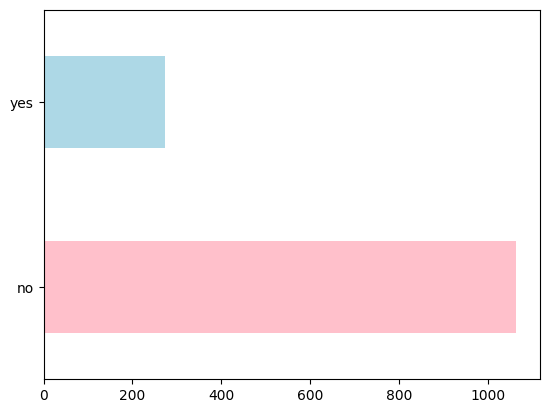


region feature has 4 unique values
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


/home/ngaitahu/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:278: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/home/ngaitahu/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


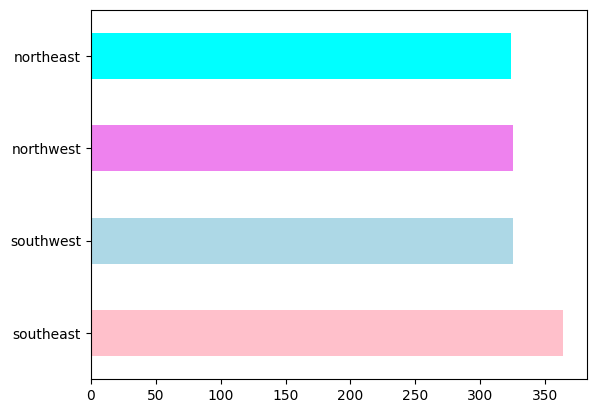

In [32]:
import matplotlib
# Finding unique values for each categorical feature
for i in obj_cols.columns:
    print(i +' feature has ' + str(df[i].nunique()) + ' unique values')
    print(df[i].value_counts())
    df[i].value_counts().plot(kind = "barh", color = ['pink', 'lightblue', 'violet', 'aqua'], colormap='Paired')
    matplotlib.pyplot.show()
    print()

In [33]:
'''
What is the range of each numerical column?
'''

num_cols = df.select_dtypes(include=['float64', 'int64'])
num_cols.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [34]:
for num_col in num_cols : 
    print(f"Column: {num_col} \n\tMin: {df[num_col].min()}\t Max: {df[num_col].max()}\n")

Column: age 
	Min: 18	 Max: 64

Column: bmi 
	Min: 15.96	 Max: 53.13

Column: children 
	Min: 0	 Max: 5

Column: charges 
	Min: 1121.8739	 Max: 63770.42801



According to the above rows, the model wouldn't be able to accurately predict charges if the values are anything above this

# EDA

<AxesSubplot:>

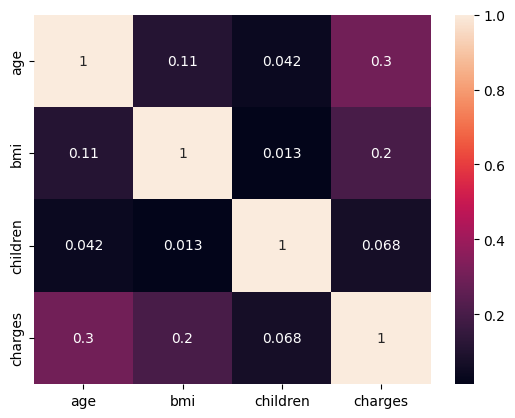

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

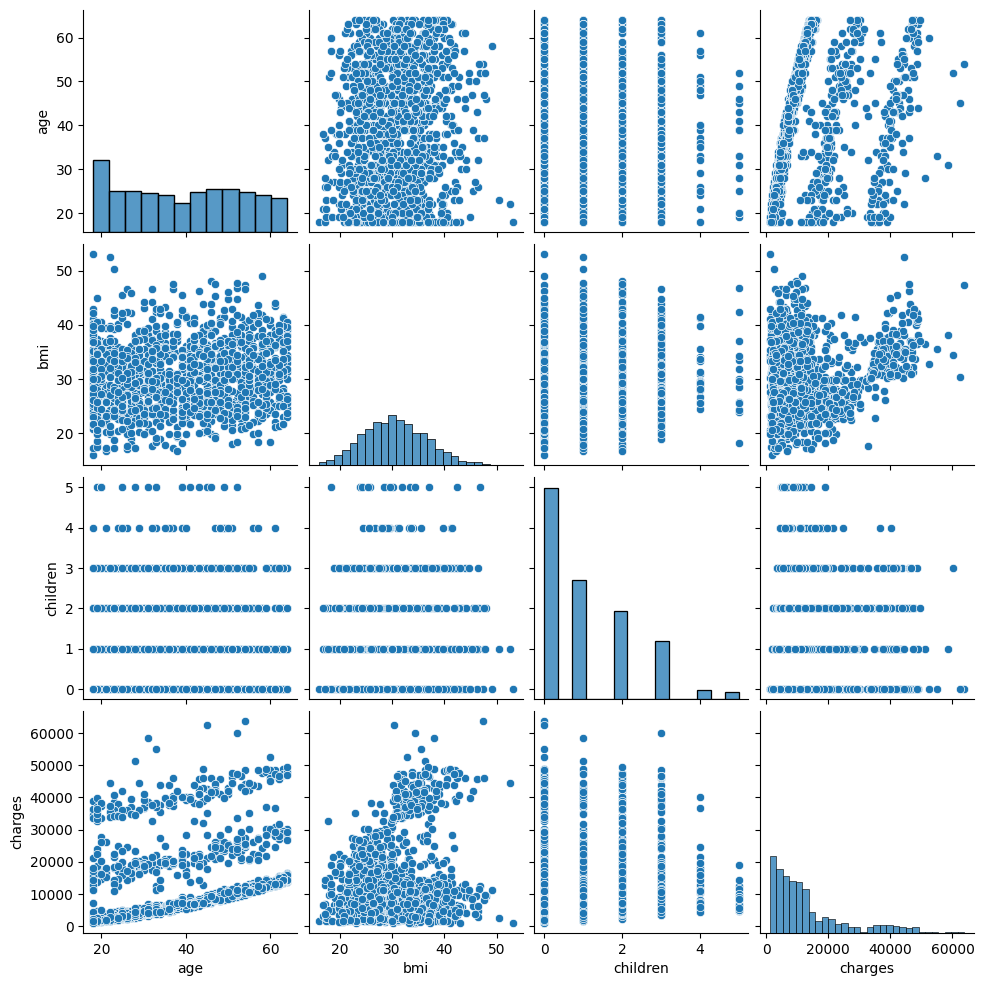

In [36]:
sns.pairplot(df)

In [37]:
# We can use get_dummies() of pandas to convert to numerical form
df = pd.get_dummies(df,drop_first=True)   
# here drop_first = True will remove first sub-feature from each feature, because we can derive deleted sub-feature from other sub-features
df.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

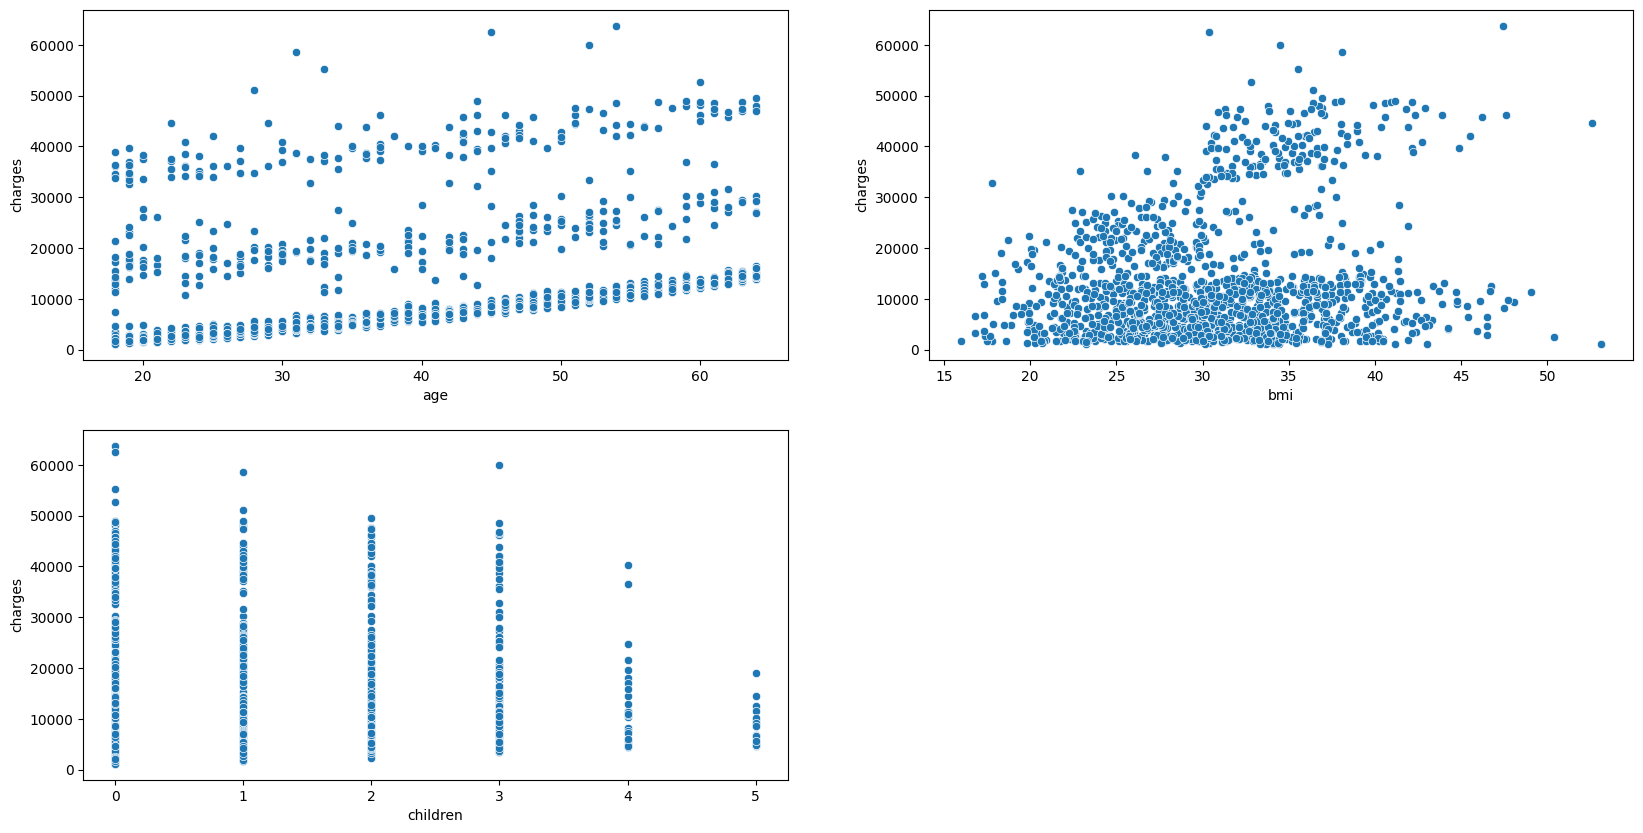

In [38]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['age','bmi','children']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feat],y=df['charges'])
plt.show()

Findings :- 

1. Older people has to pay more premium than younger ones

2. Higher BMI persons has to pay more than lower ones

3. Having high number of childern means can only spend less expenses on insurance

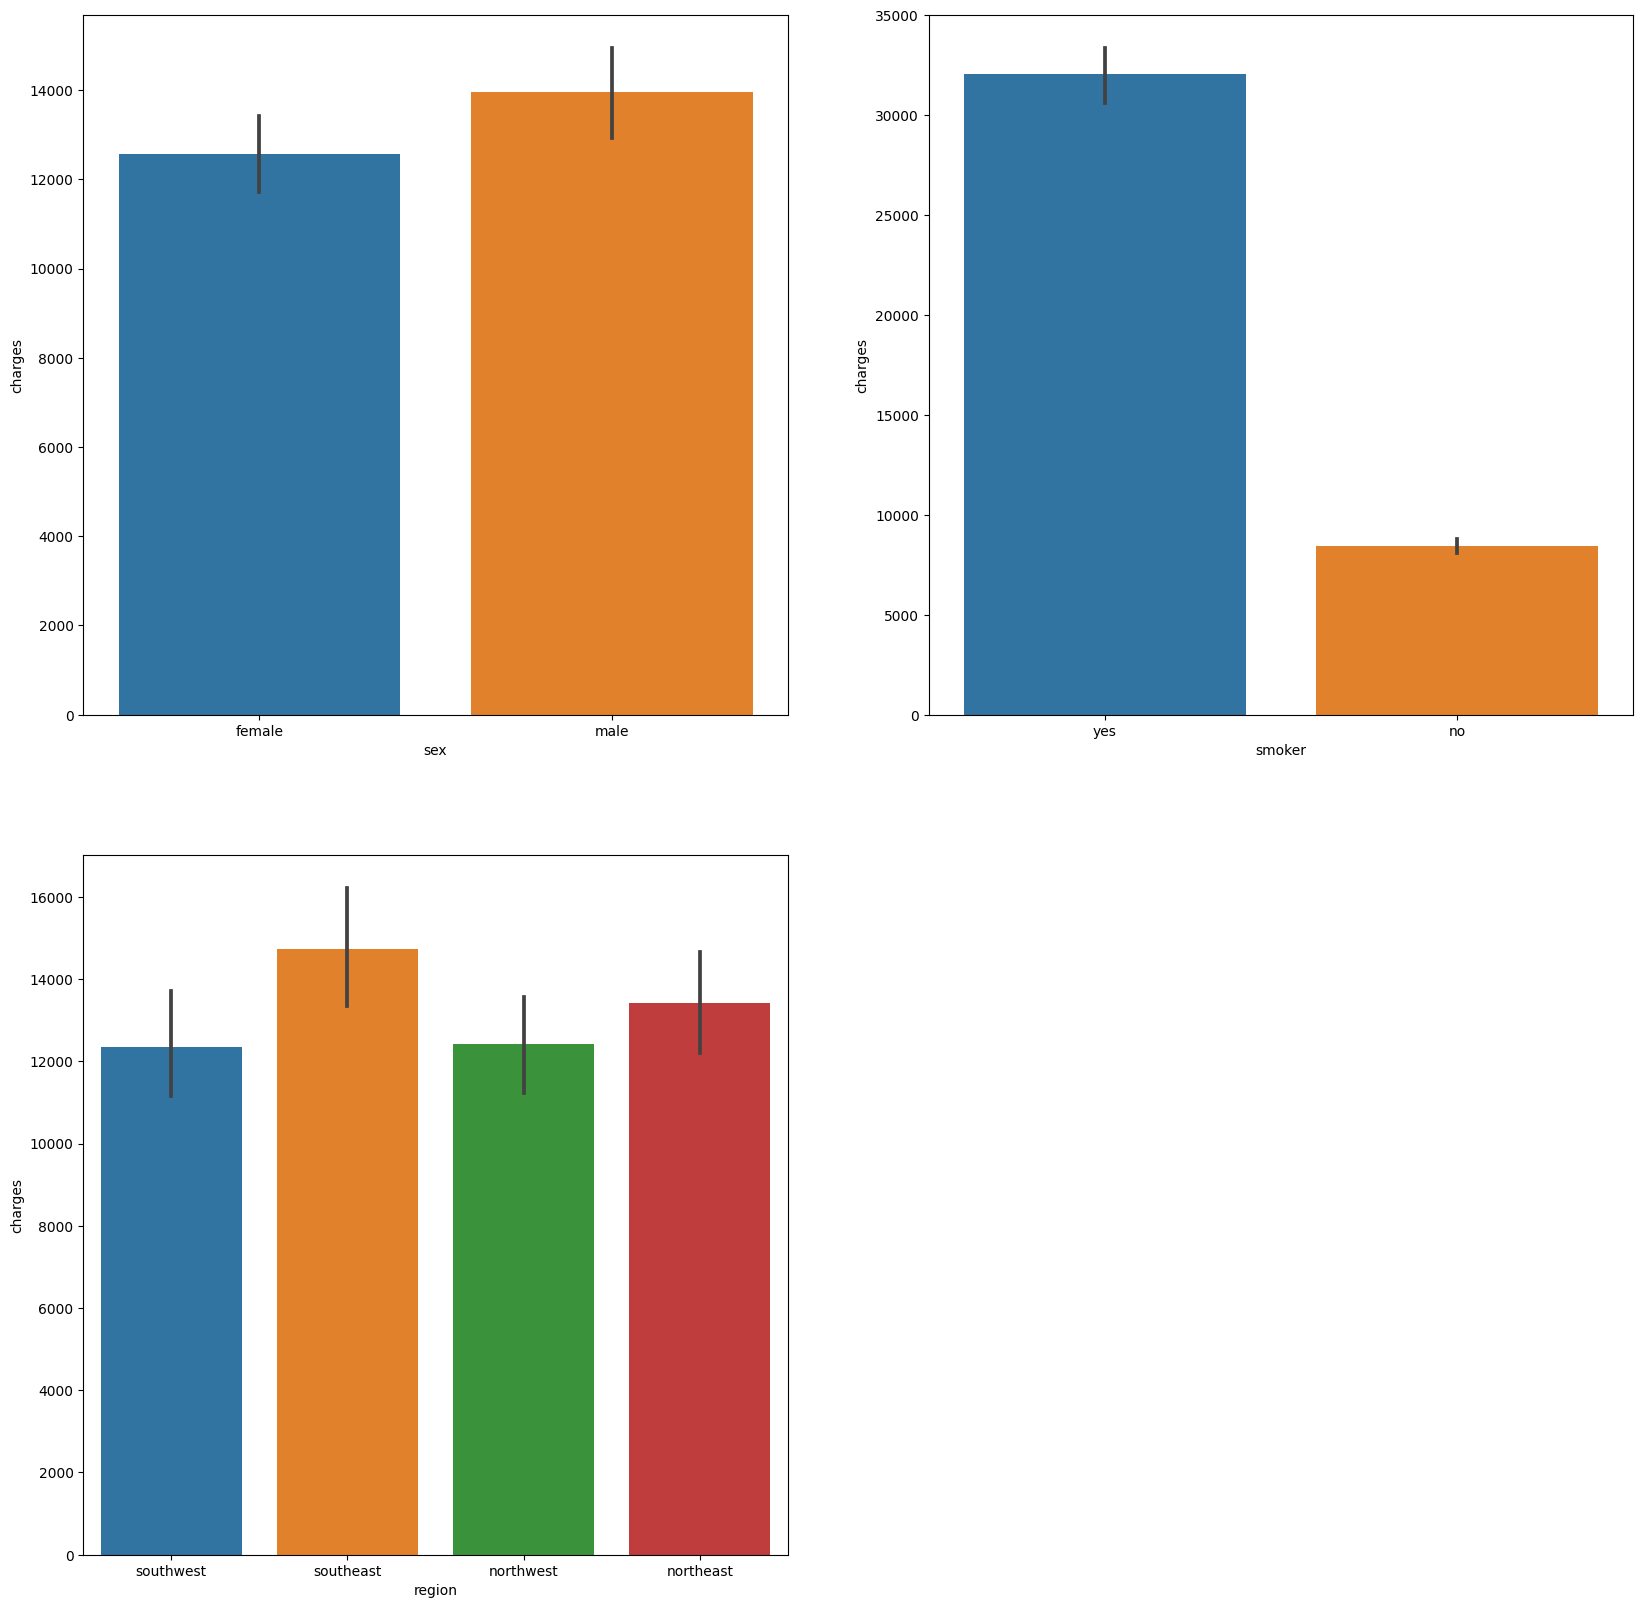

In [39]:
plt.figure(figsize=(20,20))
for i,feat in enumerate(['sex','smoker','region']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=df_copy[feat],y=df_copy['charges'])
plt.show()

Observations: - 

1. expenses doesnot varies much with respect to 'sex' feature

2. Smoker has to pay more than Non-Smoker

3. expenses doesnot varies much with respect to 'region' feature

In [40]:
# Arranging dependent and independent variables for Modeling
x = df.drop('charges',axis=1)
y = df['charges']

In [41]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/4,random_state=1)

Here we have to find continous value, so we will buld regression models

In [42]:
from sklearn.metrics import r2_score,mean_squared_error

#Linear Regression

from sklearn.linear_model import LinearRegression

le = LinearRegression()
le_model = le.fit(X_train,y_train)
# predicting values for test data
le_Ypredict = le_model.predict(X_test)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,le_Ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,le_Ypredict),2)))

MSE of Linear Regression : 35791108.69
r2 score of Linear Regression : 0.73


In [43]:
X_test.head()

age    bmi  children  sex_male  smoker_yes  region_northwest  \
559    19  35.53         0         1           0                 1   
1087   57  31.54         0         1           0                 1   
1020   51  37.00         0         1           0                 0   
460    49  36.63         3         0           0                 0   
802    21  22.30         1         1           0                 0   

      region_southeast  region_southwest  
559                  0                 0  
1087                 0                 0  
1020                 0                 1  
460                  1                 0  
802                  0                 1

In [44]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train,y_train)
# predicting values for test data
dt_Ypredict = dt_model.predict(X_test)
print('MSE of DecisionTreeRegressor : ' + str(round(mean_squared_error(y_test,dt_Ypredict),2)))
print('r2 score of DecisionTreeRegressor : ' + str(round(r2_score(y_test,dt_Ypredict),2)))

MSE of DecisionTreeRegressor : 48403792.24
r2 score of DecisionTreeRegressor : 0.64


In [45]:
# SVR

from sklearn.svm import SVR

sv = SVR()
sv_model = sv.fit(X_train,y_train)
# predicting values for test data
sv_Ypredict = sv_model.predict(X_test)
print('MSE of SVR : ' + str(round(mean_squared_error(y_test,sv_Ypredict),2)))
print('r2 score of SVR : ' + str(round(r2_score(y_test,sv_Ypredict),2)))

MSE of SVR : 146953017.57
r2 score of SVR : -0.09


In [46]:
# KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn_model = kn.fit(X_train,y_train)
# predicting values for test data
kn_Ypredict = kn_model.predict(X_test)
print('MSE of KNeighborsRegressor : ' + str(round(mean_squared_error(y_test,kn_Ypredict),2)))
print('r2 score of KNeighborsRegressor : ' + str(round(r2_score(y_test,kn_Ypredict),2)))

MSE of KNeighborsRegressor : 114000220.34
r2 score of KNeighborsRegressor : 0.15


In [47]:
# Ensemble Technices

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train,y_train)
# predicting values for test data
rf_Ypredict = rf_model.predict(X_test)
print('MSE of RandomForestRegressor : ' + str(round(mean_squared_error(y_test,rf_Ypredict),2)))
print('r2 score of RandomForestRegressor : ' + str(round(r2_score(y_test,rf_Ypredict),2)))
print('#####################################################')

# AdaBoostRegressor
ada = AdaBoostRegressor()
ada_model = ada.fit(X_train,y_train)
# predicting values for test data
ada_Ypredict = ada_model.predict(X_test)
print('MSE of AdaBoostRegressor : ' + str(round(mean_squared_error(y_test,ada_Ypredict),2)))
print('r2 score of AdaBoostRegressor : ' + str(round(r2_score(y_test,ada_Ypredict),2)))
print('#####################################################')

# GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb_model = gb.fit(X_train,y_train)
# predicting values for test data
gb_Ypredict = gb_model.predict(X_test)
print('MSE of GradientBoostingRegressor : ' + str(round(mean_squared_error(y_test,gb_Ypredict),2)))
print('r2 score of GradientBoostingRegressor : ' + str(round(r2_score(y_test,gb_Ypredict),2)))
print('#####################################################')

# GradientBoostingRegressor
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train,y_train)
# predicting values for test data
xgb_Ypredict = xgb_model.predict(X_test)
print('MSE of XGBRegressor : ' + str(round(mean_squared_error(y_test,xgb_Ypredict),2)))
print('r2 score of XGBRegressor : ' + str(round(r2_score(y_test,xgb_Ypredict),2)))
print('#####################################################')

MSE of RandomForestRegressor : 24766558.37
r2 score of RandomForestRegressor : 0.82
#####################################################
MSE of AdaBoostRegressor : 26135255.27
r2 score of AdaBoostRegressor : 0.81
#####################################################
MSE of GradientBoostingRegressor : 19711004.22
r2 score of GradientBoostingRegressor : 0.85
#####################################################
MSE of XGBRegressor : 26633161.97
r2 score of XGBRegressor : 0.8
#####################################################


In [50]:
X =[[63.  ,  0.  , 25.08,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ]]

gb_model.predict(X)[0]

/home/ngaitahu/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


24564.333418388414

# SAVE MODEL INTO A .pkl file

In [48]:
import pickle

with open('../app/static/model/model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)